In [212]:
import numpy as np
import magnonRPA as rpa

from matplotlib import pyplot as plt 
from matplotlib import colors as mclr
from matplotlib import colormaps as cmaps

import time

In [236]:
def correlator_PBC(f,g):
    """Accepts arrays f,g w/shape (Nx,Nky,Nw) and returns the circular autocorrelation with automatically zero-padded last axis.
    Precisely this retuns z[i,j,k] = sum_{l,m,n} x[l,m,n] * y[i+l,j+m,k+n] padded appropriately on last axis.
    Finally, this shifts the frequencies to the center again at the end. 
    If number of passed frequencies is even this will generate an extra frequency point at zero to make the result N+1.
    """
    pad_size = f.shape[-1]
    
    f_padded = np.pad(f,( (0,0),(0,0),(pad_size,pad_size) ) ) 
    g_padded = np.pad(g,( (0,0),(0,0),(pad_size,pad_size) ) )  

    ### Now we take the FFT of both arrays 
    f_fft = np.fft.fftn(f_padded)
    g_fft = np.fft.fftn(g_padded)
    
    ### Next we take an element-wise product 
    ### conjugate to compute correlation instead of convolution
    h_fft = f_fft*np.conjugate(g_fft) 

    ### Now we transform back
    h_padded = np.fft.ifftn(h_fft)

    ### Roll and chop
    ### We want to roll so that the zero frequency is in the middle 
    h = np.fft.fftshift(h_padded,axes=-1)
    h = h[:,:,pad_size:2*pad_size]
    
    return np.real(h)

In [237]:
Nx = 40
Ny = 40
Nz = 21
x = np.linspace(0.,2.*np.pi,Nx,endpoint=False)
y = np.linspace(0.,2.*np.pi,Ny,endpoint=False)
z = np.linspace(-5.,5.,Nz)

dz = z[1]-z[0]

In [238]:
xs,ys,zs = np.meshgrid(x,y,z)

In [239]:
def A1g(x,y):
    return 0.5*np.cos(x) +0.5*np.cos(y)

In [240]:
a1g = A1g(xs,ys)
gaussian = np.exp(-zs**2)

f = a1g*gaussian
g = f.copy()

h = correlator_PBC(f,g)*dz/float(Nx*Ny)

h_rpa = rpa.correlator_PBC(f,g)*dz/float(Nx*Ny)

h_analytic = 0.25*a1g*np.sqrt(np.pi/2.*gaussian)

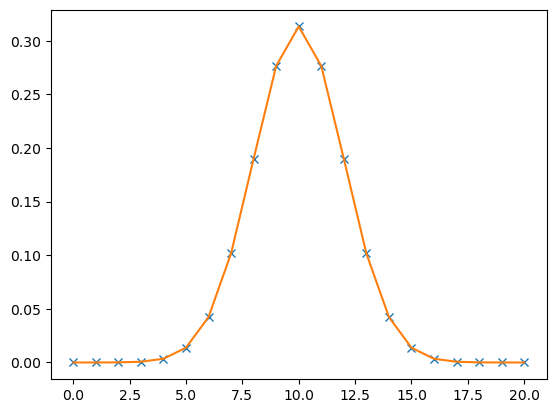

In [241]:
plt.plot(h[0,0,:],'x')
plt.plot(h_analytic[0,0,:])
plt.show()